##  Can we explain the heavy traffic on I-94?

### Table of Contents
***
1 [GOAL](#definition)

1.1 [BUSINESS PROBLEM](#problem)

2 [DISCOVER](#discover)

2.1 [Load](#loadthelibrariesfile)

2.2 [Function definitions and structures](#functions)

2.3 [Data Exploration](#explore)

2.4 [Feature Engineering](#Engineer)

2.5 [Key Visualisations](#functioncalls)

3 [Conclusion](#summary)


### 1: GOAL
<a id="definition"></a>

 Identify key indicators of heavy traffic on I-94 highway
***

*Source of the data* : https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

*Assumptions about data and data quality*: 

- We will not focus on cleaning of data, assuming that it's been fairly cleaned and uploaded on he UCI Machine Learning Repository.

- A station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. 

- Also, the station only records westbound traffic (cars moving from east to west).

- The results therefore will be analysed about the westbound traffic in proximity of the station.


### 1.1: BUSINESS PROBLEM
<a id="problem"></a>

1. Identify the key drivers of high traffic volume on I-94

2. Can we take an informed decision about the traffic indicators, communicate to the concerned authorities and come up with away to manage the traffic?

3. Can we convey where to invest/manage infrastructure or money on traffic controls on I-94?

### 2: DISCOVER
<a id="discover"></a>

This section consists of:

1. *Loading of files/libraries and exploratory data analysis*

2. *Function definitions*

3. *Feature Engineering*

4. *Visualisations using the function calls*



### 2.1: Load
<a id="loadthelibrariesfile"></a>

**Consists of loading the files and importing the necessary librarires for analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### 2.2: Function definition and structures
<a id="functions"></a>

In [2]:
def grid_chart(df_1,
               df_2,
               s_1=None,
               s_2=None,
               title_1=None,
               title_2=None,
               xlabel=None,
               ylabel=None,
               chart_type=None,
               xlimit_top=None,
               xlimit_bottom=None,
               ylimit_top=None,
               ylimit_bottom=None
               ):
    """Plot a grid chart of an input dataFrame.

    df_1 (DataFrame): input dataframe 1
    df_2 (DataFrame): input dataframe 2
    s_1 (Series): chosen column as x-axis for the gridcharts
    s_2 (Series): chosen column as y-axis for the gridcharts
    title_1 (string): title of 1st grid chart
    title_2 (string): title of 2nd grid chart
    xlabel (string): label of x axes of grid charts
    ylabel (string): label of y axes of grid charts
    chart_type (type of chart): plots a histogram if value set
    to 'hist' else plots a lineplot
    xlim_bottom (int): start value of x axis
    xlim_top (int): right limit of x axis
    ylim_bottom (int): top limit of y axis
    ylim_top (int): start of y axis
    Returns_:
    gridchart(histogram/lineplot) (figure) with two axes: matplotlib figure
    """
    fig, ax = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.4)
    if chart_type == "hist":
        ax[0].hist(df_1[s_2])
        ax[1].hist(df_2[s_2])
    else:
        ax[0].plot(df_1[s_1], df_1[s_2])
        ax[1].plot(df_2[s_1], df_2[s_2])
    ax[0].set_title(title_1)
    ax[0].set_xlabel(xlabel)
    ax[0].set_xlim(xlimit_bottom,  xlimit_top)
    ax[0].set_ylabel(ylabel)
    ax[0].set_ylim(ylimit_bottom, ylimit_top)
    ax[1].set_title(title_2)
    ax[1].set_xlabel(xlabel)
    ax[1].set_xlim(xlimit_bottom, xlimit_top)
    ax[1].set_ylabel(ylabel)
    ax[1].set_ylim(ylimit_bottom, ylimit_top)
    return fig, ax

 
def groupings(df, new_col=None):
    """Group the input dataframe by a chosen column using a mean aggregation.

    df (DataFrame): input dataframe
    new_col (Series): chosen column for aggregation
    Returns_:
    grouped_df: DataFrame
    """
    grouped_df = df.groupby(new_col).mean()
    grouped_df = grouped_df.reset_index()
    return grouped_df


# Generate line plots
# Generate line plots
def create_lineplot(df, s_1=None,
                    s_2=None,
                    chart_title=None,
                    x=None,
                    y=None,
                    ):
    """Plot a lineplot of an input dataFrame.

    df (DataFrame): input dataframe
    s_1 (Series): chosen column as x-axis for lineplot
    s_2 (Series): chosen column as y-axis for lineplot
    chart_title (String): title of the lineplot
    x (string): label of the x-axis
    y (string): label of the y-axis
    Returns_:
    lineplot (figure) and axis: matplotlib figure
    """
    fig, ax = plt.subplots()
    plt.plot(df[s_1], df[s_2])
    plt.title(chart_title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return fig, ax


def create_scatterplot(df, s_1=None,
                       s_2=None,
                       xlim_bottom=None,
                       xlim_top=None,
                       ylim_bottom=None,
                       ylim_top=None
                       ):
    """Plot a scatterplot of an input dataFrame.

    df (DataFrame): input dataframe
    s_1 (Series): chosen column as x-axis for lineplot
    s_2 (Series): chosen column as y-axis for lineplot
    xlim_bottom (int): start value of x axis
    xlim_top (int): right limit of x axis
    ylim_bottom (int): top limit of y axis
    ylim_top (int): start of y axis
    Returns_:
    scatterplot (figure) and axis: matplotlib figure
    """
    fig, ax = plt.subplots()
    plt.scatter(df[s_1], df[s_2])
    ax.set_xlim(xlim_bottom, xlim_top)
    ax.set_ylim(ylim_bottom, ylim_top)
    plt.show()
    return fig, ax


def create_barchart(df, s_1=None,
                    s_2=None,
                    chart_title=None,
                    x=None,
                    y=None,
                    horizontalplot=False):
    """Plot a barchart of an input dataFrame.

    df (DataFrame): input dataframe
    s_1 (Series): chosen column as x-axis for lineplot
    s_2 (Series): chosen column as y-axis for lineplot
    chart_title (String): Title of the bar plot
    x (String): Label of x-axis
    y (String): Label of y-axis
    horizontalplot (boolean): plots a horizonatal bar plot if True
    Returns_:
    barchart (figure) and axis: matplotlib figure
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    colormap = plt.cm.get_cmap('Dark2')
    if horizontalplot:
        plt.barh(df[s_1], df[s_2], color=colormap.colors)
        plt.title(chart_title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    else:
        plt.bar(df[s_1], df[s_2])
        plt.title(chart_title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    return fig, ax


### 2.3: Data Exploration
<a id="explore"></a>

In [3]:
metro_data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
# Examining the first five rows
metro_data.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# Examining the last five rows
metro_data.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<AxesSubplot:>

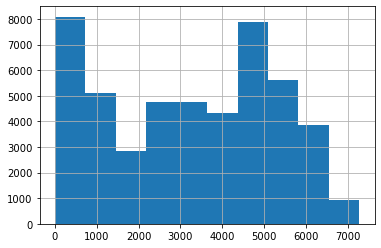

In [6]:
metro_data['traffic_volume'].hist()

In [7]:
metro_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

1. *About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.*


2. *About 25% of the time, the traffic volume was four times as much (4,933 cars or more).*

In [8]:
#Tranforming the date_time column into datetime
metro_data["date_time"] = pd.to_datetime(metro_data["date_time"])
metro_data["hour"] = metro_data["date_time"].dt.hour
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [9]:
# Create day and night masks

day_mask = ((metro_data["hour"] >=7) & (metro_data["hour"] <= 19))

night_mask = ((metro_data["hour"] >= 19) | (metro_data["hour"] <= 7))

day_traffic = metro_data[day_mask]

night_traffic = metro_data[night_mask]

In [10]:
day_traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,18


In [11]:
night_traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'day_traffic'}, xlabel='traffic_volume', ylabel='counts'>,
        <AxesSubplot:title={'center':'night_traffic'}, xlabel='traffic_volume', ylabel='counts'>],
       dtype=object))

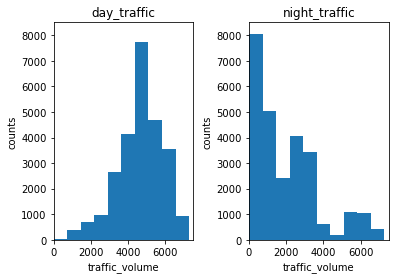

In [12]:
# grid chart function call
grid_chart(day_traffic, night_traffic, s_2="traffic_volume",
           title_1="day_traffic", title_2="night_traffic",
           xlabel="traffic_volume",
           ylabel="counts",
           chart_type="hist",
           xlimit_top=7500,
           xlimit_bottom=0,
           ylimit_top=8500,
           ylimit_bottom=0)

In [13]:
#analyse the day and night traffic for both the data sets
night_traffic["traffic_volume"].describe()

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

In [14]:
day_traffic["traffic_volume"].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

1. *The histograms indicate clearly that the traffic is higher during the day time*

2. *It makes sense to analyse the day traffic instead to understand the indicators of heavy traffic*

3. *Analysis from here on will be focused on day traffic data only*

### 2.4: Feature Engineering
<a id="Engineer"></a>

In [15]:
# Feature Engineering
day_traffic['month'] = day_traffic['date_time'].dt.month
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
day_traffic['hour'] = day_traffic['date_time'].dt.hour
# 4 == Friday
bussiness_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4]
# 5 == Saturday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5]
by_hour_business = groupings(bussiness_days, new_col='hour')
by_hour_weekend = groupings(weekend, new_col='hour')

<ipython-input-15-f3126a8afe7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_traffic['month'] = day_traffic['date_time'].dt.month
<ipython-input-15-f3126a8afe7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
<ipython-input-15-f3126a8afe7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

### 2.5: Key Visualisations
<a id="functioncalls"></a>

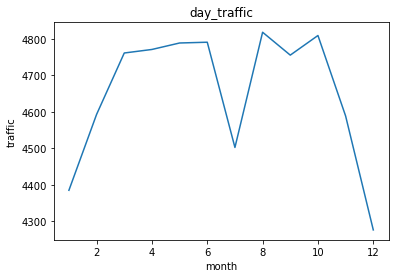

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'day_traffic'}, xlabel='month', ylabel='traffic'>)

In [16]:
# group the day_traffic data by month column and have a mean aggregate
group_by_month = groupings(day_traffic, new_col='month')

# create a line plot of the monthly grouped data
create_lineplot(group_by_month, s_1="month", s_2="traffic_volume",
                chart_title="day_traffic",
                x="month",
                y="traffic"
                )

**Summary Lineplot: monthly data**
***
1. *Months of January and December show lesser traffic, which can be attributed to holidays and new year time*

2. *Month of August(7) shows an unusual dip in traffic volume as well, which is rather an outlier and should be understood in detail in further analysis*

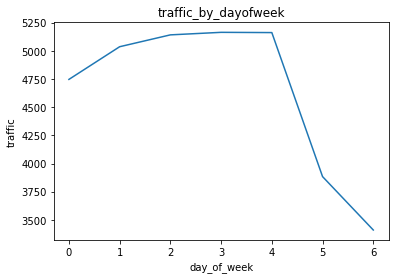

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'traffic_by_dayofweek'}, xlabel='day_of_week', ylabel='traffic'>)

In [17]:
# group the data by the day of week
by_dayofweek = groupings(day_traffic, new_col='dayofweek')

# visualise the traffic by day_of_week
create_lineplot(by_dayofweek, s_1="dayofweek", s_2="traffic_volume",
                chart_title="traffic_by_dayofweek",
                x="day_of_week",
                y="traffic")


**Summary Lineplot: daily traffic for day traffic**
***
1. *Traffic volume is higher on the first 5 days of the week.*

2. *Traffic volume decreases considerably on the weekends (last 2 days).*

3. *Now, it makes sense to analyse hourly traffic data on weekdays and weekends, by using grid chart.*

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'business_days'}, xlabel='hour_of_day', ylabel='traffic'>,
        <AxesSubplot:title={'center':'weekends'}, xlabel='hour_of_day', ylabel='traffic'>],
       dtype=object))

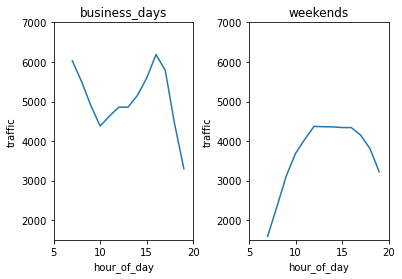

In [18]:
grid_chart(by_hour_business,
           by_hour_weekend,
           s_1="hour",
           s_2="traffic_volume",
           title_1="business_days",
           title_2="weekends",
           xlabel="hour_of_day",
           ylabel="traffic",
           chart_type=None,
           xlimit_top=20,
           xlimit_bottom=5,
           ylimit_top=7000,
           ylimit_bottom=1500)

**Summary gridchart: weekdays/weekend hourly traffic**
***
1. *business days: On an average, the traffic volume is higher in first few hours, decreases around the 10th hour, increases in the evening (15th-16th) hour and a sharp decrease thereafter.*

2. *weekends: On an average, the traffic volume is lower on weekends, attains a plateau around the 10th-11th hour, and starts decreasing post 15th-16th hour.*
***
*Next steps: Having analysed the dependance of traffic volume on time of the day, it is now critical to understand the correlation of traffic on other factors*

In [19]:
#print out the correlaton between different columns of the day_traffic data
day_traffic[["traffic_volume", "temp", "rain_1h", "snow_1h",
             "clouds_all", "weather_main",
             "weather_description"]].corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.118084,0.004020,0.003768,-0.033410
temp,0.118084,1.000000,0.010418,-0.018720,-0.140432
rain_1h,0.004020,0.010418,1.000000,-0.000077,0.004881
snow_1h,0.003768,-0.018720,-0.000077,1.000000,0.026688
clouds_all,-0.033410,-0.140432,0.004881,0.026688,1.000000


**Summary correlation: all columns on day_traffic**
***
*The highest positive correlation of traffic volume is with the temperature column*

*Next steps: Let us plot the traffic volume as a scatter plot and dependance on temperature column*

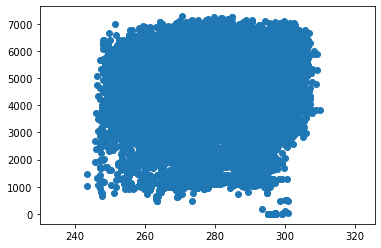

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [20]:
create_scatterplot(day_traffic, s_1="temp", s_2="traffic_volume",
                   xlim_bottom=230)

**Summary scatterplot**

*The scatterplot appears to be inconclusive and does not provide a lot of 
useful/extra information about traffic dependance on temperature variance*
***

**Next Steps**

1. Understand the impact of some of the categorical variables like "Weather_description", "Weather_main" on traffic volume.

2. Use simple bar charts to demonstrate the relationships clealy.




In [21]:
#Group the data by "weather_main" and "weather_description columns"

by_weather_main = groupings(day_traffic, new_col="weather_main")
by_weather_description = groupings(day_traffic,
                                   new_col="weather_description")


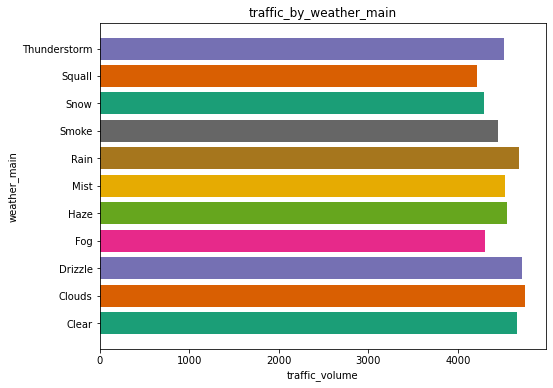

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:title={'center':'traffic_by_weather_main'}, xlabel='traffic_volume', ylabel='weather_main'>)

In [22]:
create_barchart(by_weather_main, "weather_main", "traffic_volume",
                chart_title="traffic_by_weather_main",
                x="traffic_volume",
                y="weather_main",
                horizontalplot=True)

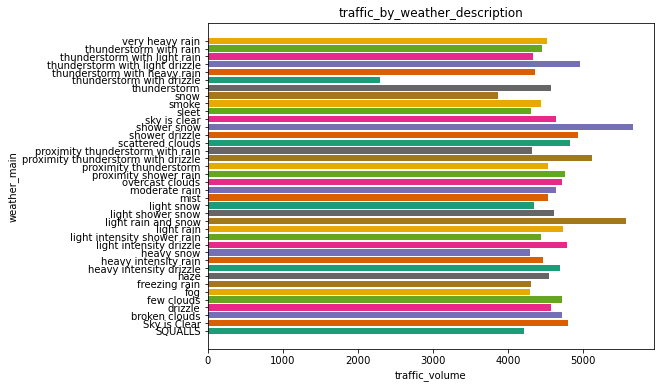

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:title={'center':'traffic_by_weather_description'}, xlabel='traffic_volume', ylabel='weather_main'>)

In [23]:
create_barchart(by_weather_description, "weather_description",
                "traffic_volume",
                chart_title="traffic_by_weather_description",
                x="traffic_volume",
                y="weather_main",
                horizontalplot=True)

**Summary of bar charts: categorical variables**
***
*Weather_main*: Squall and Fog show lower traffic volume, but other weather patterns do not seem to impact traffic volume in a significant way.

*Weather_description*: **Shower snow** and **light rain and snow** are outliers, with traffic volume going beyond 5000 on an average.**Thunderstorm with light drizzle** has the lowest traffic volume on average.


### 2.6: Conclusion
<a id="summary"></a>

1. Traffic is higher during the day time on I-94, especially on the weekdays.

2. Within the business days, there are specific hours (peaks around 7 and 16).

3. On an average, the month of July shows lower traffic volume, which is an interesting result and should be investigated further. The warmer months btween (March-October) show a higher traffic as compared to the colder months.

4. When other numerical factors were taken into account, it appeared that temperature might have some positive correlation with traffic volume, although 
it doesnt appear to show any significant relation.

5. When the categorical variables were analysed, a few intersting insights came out: *Squall* and *Fog* show lower traffic volume, *Shower snow* and *light rain and snow* are outliers, with traffic volume going beyond 5000 on an average.